# Modelo Hanseniase

### Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from scipy.integrate import odeint
import matplotlib.pyplot as pl
import scipy.io

## Condicoes iniciais

In [16]:
S0          = 0.9
L0          = 0
P0          = 0.1
M0          = 0
R0          = 0

condicoes_iniciais = [S0, L0, P0, M0, R0]

## Definindo modelo

In [17]:
def hansen(y, t):

    mu = 1/70
    gamma = 0.75
    beta_m = 0
    beta_p = 0
    rho = 0.05
    sigma_p = 0.73
    omega_p = 0.25
    omega_m = 0.1
    delta_m = 1/12
    delta_p = 1/12


    S = y[0]
    L = y[1]
    P = y[2]
    M = y[3]
    R = y[4]

    dSdt = mu*(1-gamma) - ( beta_p*P + beta_m*M )*S - mu*S
    dLdt = (beta_p*P + beta_m*M)*S - (sigma_p*omega_p - (1-sigma_p)*omega_m)*L - mu*L
    dPdt = rho*sigma_p*omega_p*L - mu*P - delta_p*P
    dMdt = rho*(1-sigma_p)*omega_m*L - mu*M - delta_m*M
    dRdt = (1-rho)*sigma_p*omega_p*L + (1-rho)*(1-sigma_p)*omega_m*L + delta_m*M + delta_p*P - mu*R - mu*gamma

    return [dSdt, dLdt, dPdt, dMdt, dRdt]

# Chamando modelo

In [18]:
tempo = list(range(0, 200))

resultados = odeint(hansen, condicoes_iniciais, tempo)

resultados_modelo = resultados

Sm = resultados[:,0]
Lm = resultados[:,1]
Pm = resultados[:,2]
Mm = resultados[:,3]
Rm = resultados[:,4]

## Plotando gráficos

### Suceptiveis

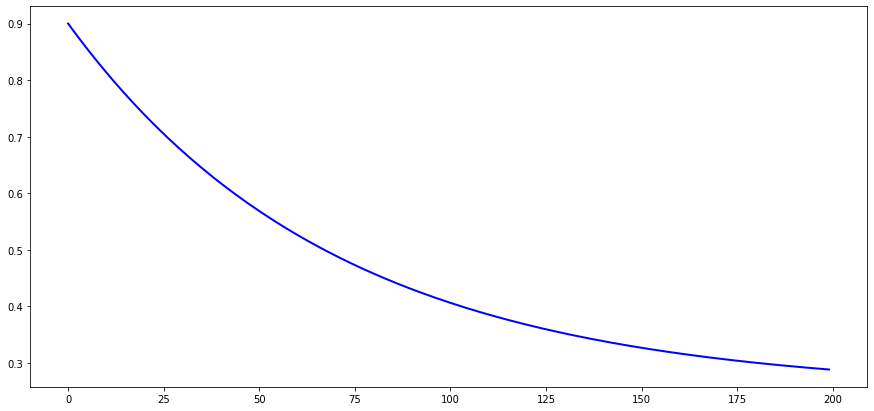

In [19]:
fig, ax = pl.subplots(figsize=(15,7))
ax.plot(tempo,  Sm, color='b',zorder=1, linewidth=2)
ax.autoscale()
pl.show()

### Latentes

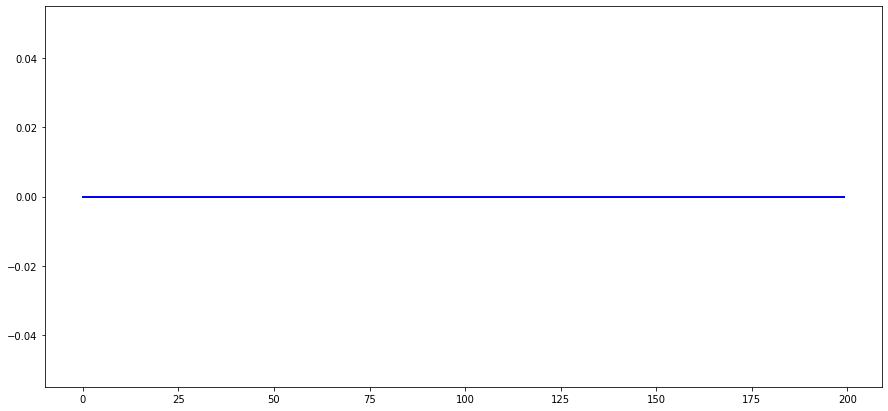

In [20]:
fig, ax = pl.subplots(figsize=(15,7))
ax.plot(tempo,  Lm, color='b',zorder=1, linewidth=2)
ax.autoscale()
pl.show()

### Paucibacilares

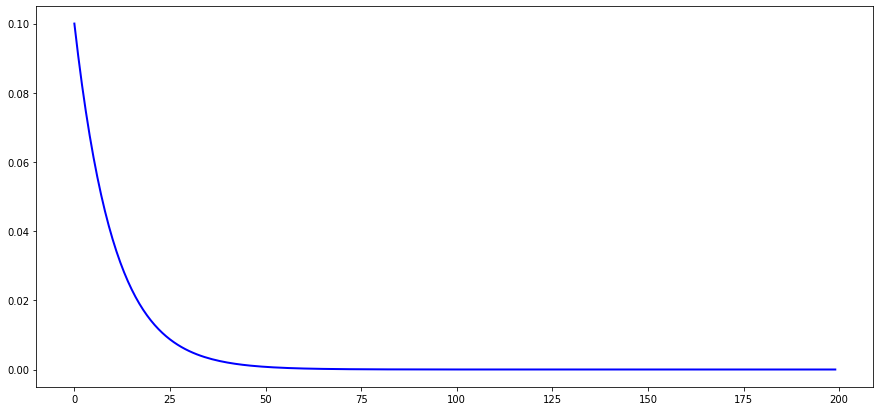

In [21]:
fig, ax = pl.subplots(figsize=(15,7))
ax.plot(tempo,  Pm, color='b',zorder=1, linewidth=2)
ax.autoscale()
pl.show()

### Multibacilares

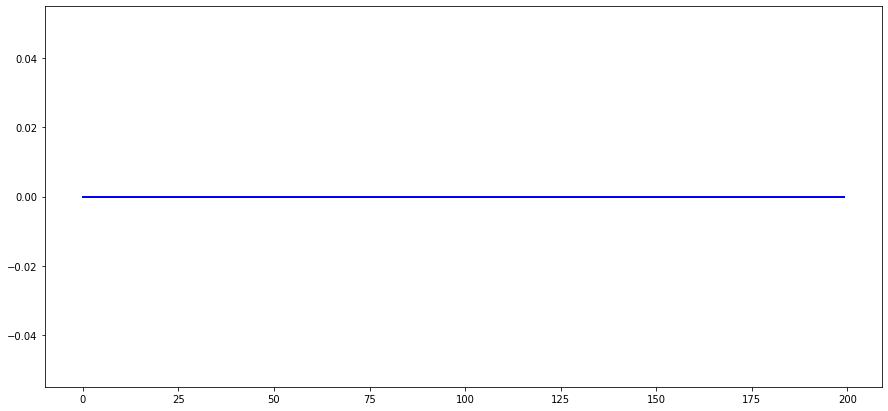

In [22]:
fig, ax = pl.subplots(figsize=(15,7))
ax.plot(tempo,  Mm, color='b',zorder=1, linewidth=2)
ax.autoscale()
pl.show()

### Recuperados

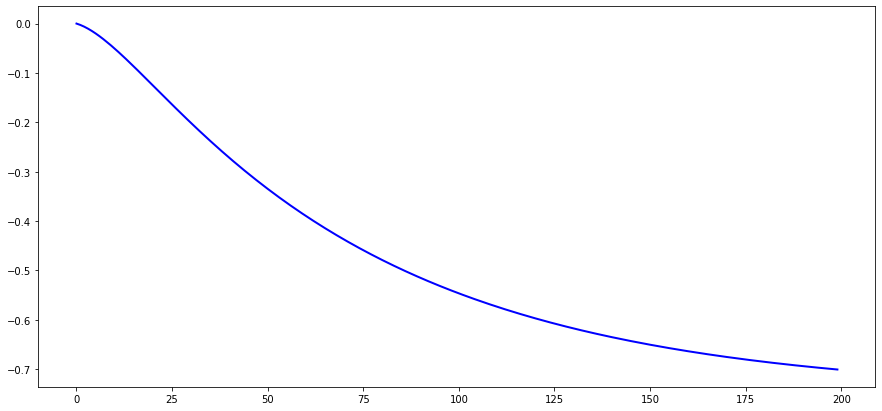

In [23]:
fig, ax = pl.subplots(figsize=(15,7))
ax.plot(tempo,  Rm, color='b',zorder=1, linewidth=2)
ax.autoscale()
pl.show()